In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


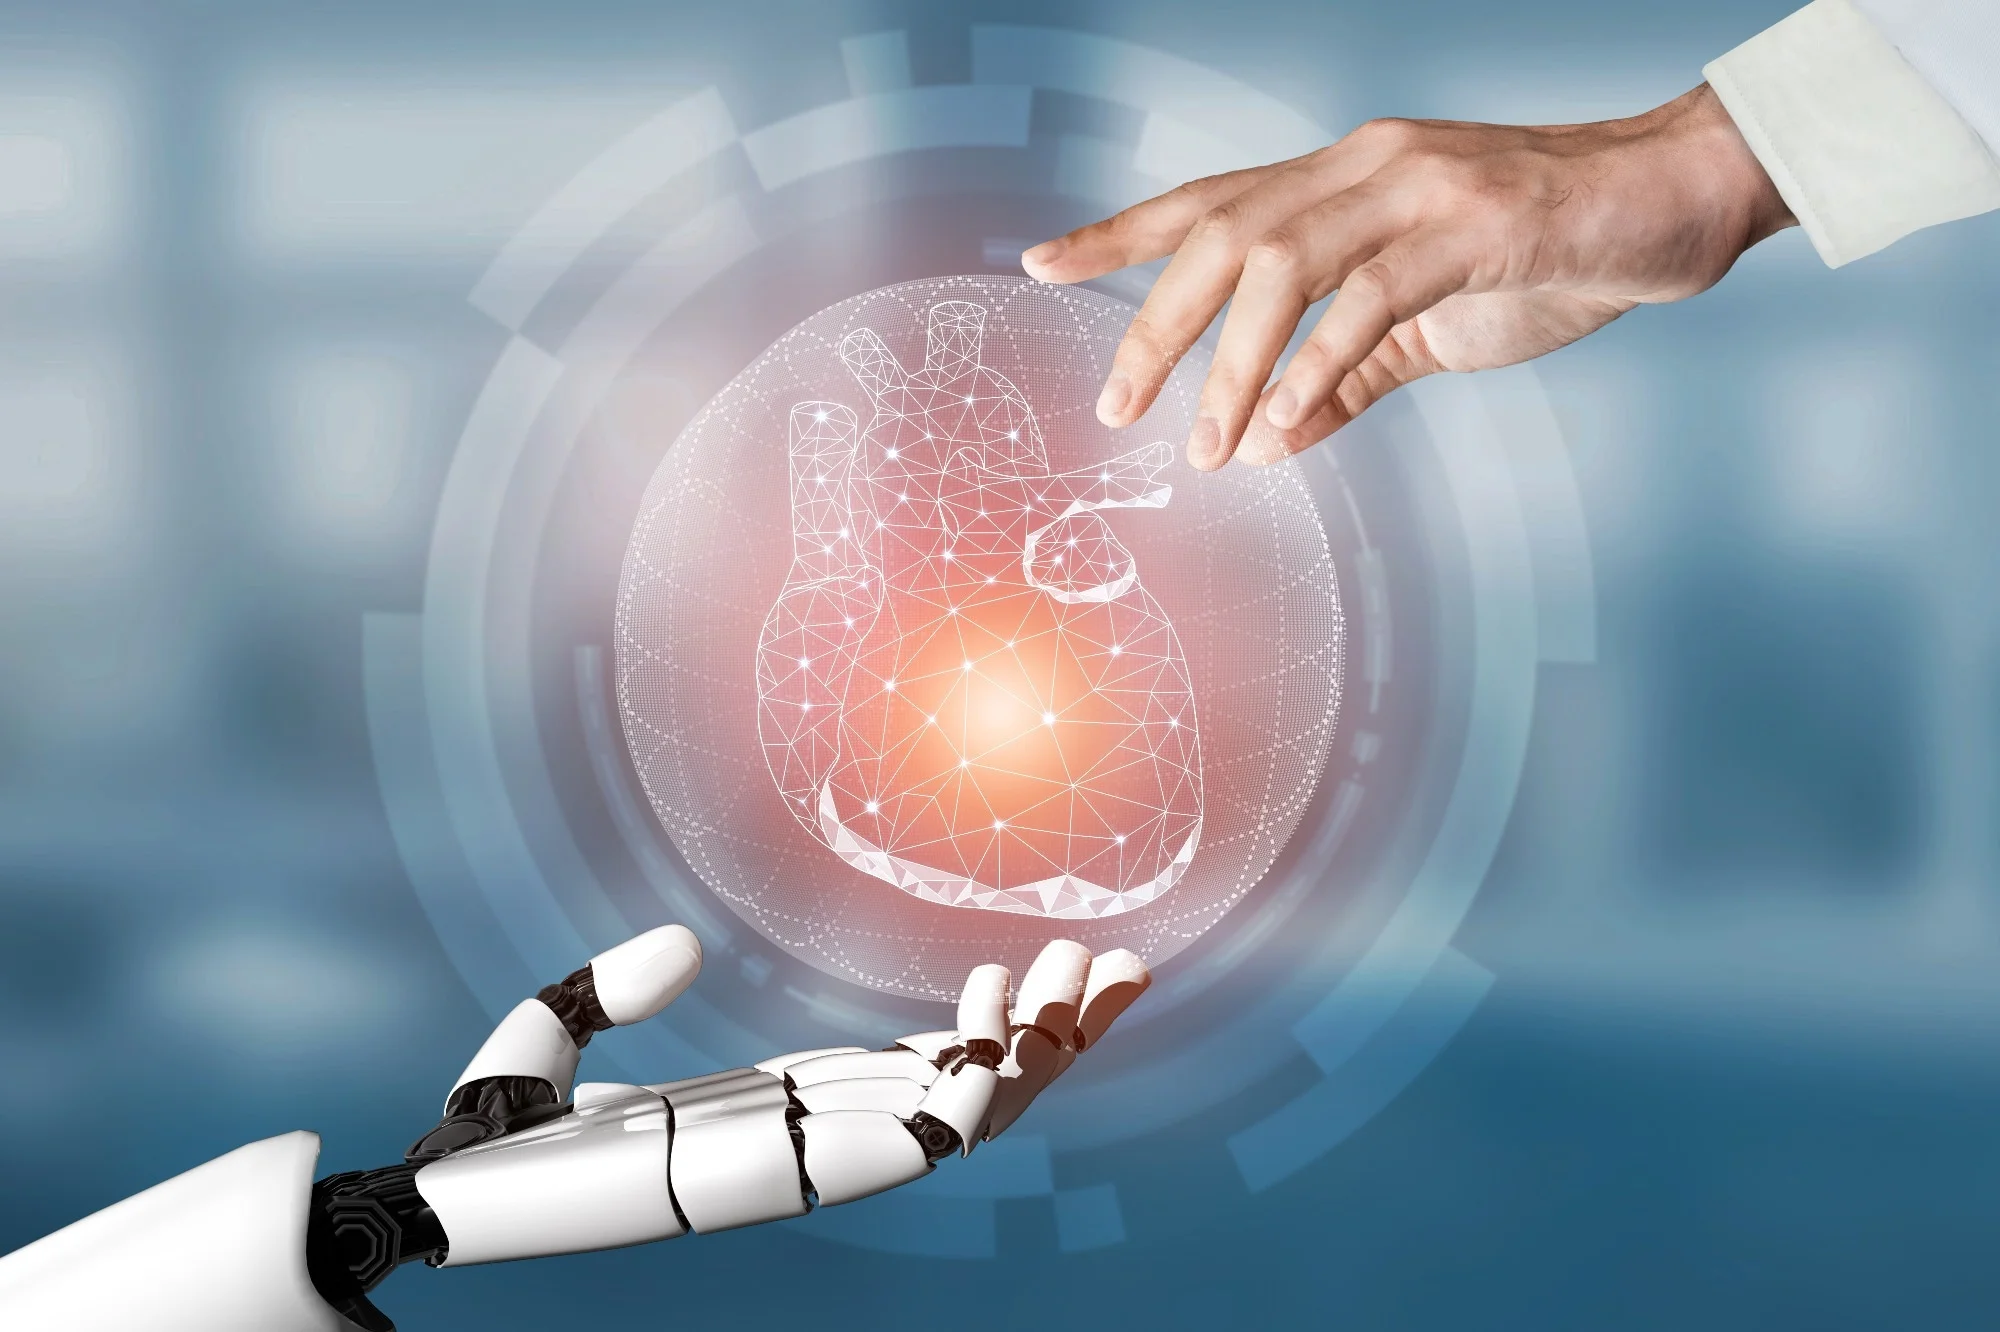

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Datasets/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
train_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
train_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
train_data.shape

(1025, 14)

In [ ]:
test_data.shape

(303, 14)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
train_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
test_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
train_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

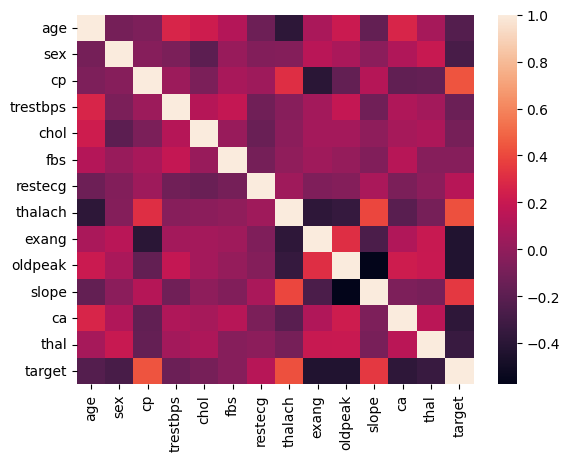

In [ ]:
sns.heatmap((train_data).corr())

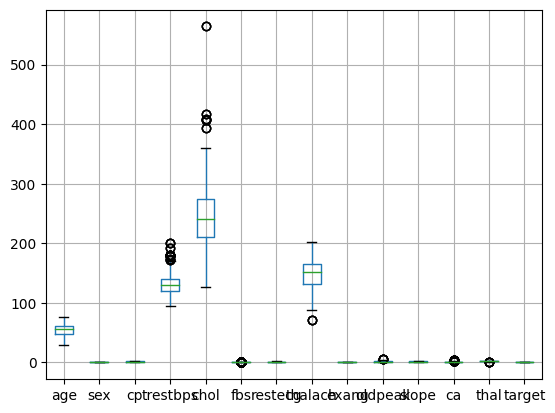

In [ ]:
train_data.boxplot()
plt.show()

In [ ]:
for column in train_data.columns:
    if train_data[column].dtype in ['int64', 'float64']:
        Q1 = train_data[column].quantile(0.25)
        Q3 = train_data[column].quantile(0.75)
        IQR = Q3 - Q1
        min_range= Q1 - 1.5 * IQR
        max_range= Q3 + 1.5 * IQR
        train_data=train_data[(train_data[column]>=min_range)&(train_data[column]<=max_range)]

In [ ]:
# checking the distribution of Target Variable
train_data['target'].value_counts()

target
1    422
0    347
Name: count, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

Splitting the Data into Training data & Test Data

In [ ]:
x_train = train_data.drop(columns=['target'])
y_train = train_data['target']


x_test = test_data.drop(columns=['target'])
y_test = test_data['target']

In [ ]:
ss=StandardScaler()
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

# **Model Training**



## K NEighbors Classifier

In [ ]:
model = KNeighborsClassifier()

In [ ]:
# training the LogisticRegression model with Training data
model.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
y_pred=model.predict(x_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       138
           1       0.96      0.92      0.94       165

    accuracy                           0.93       303
   macro avg       0.93      0.94      0.93       303
weighted avg       0.94      0.93      0.93       303



## SVM

In [ ]:
svmmodel = SVC()
svmmodel.fit(x_train_scaled,y_train)
y_preds=svmmodel.predict(x_test_scaled)

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       138
           1       0.93      0.88      0.90       165

    accuracy                           0.90       303
   macro avg       0.90      0.90      0.90       303
weighted avg       0.90      0.90      0.90       303



## Naive Bayes Algorithm

In [ ]:
nbmodel=MultinomialNB()
nbmodel.fit(x_train,y_train)
y_predss=nbmodel.predict(x_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [ ]:
print(classification_report(y_test,y_predss))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       138
           1       0.81      0.83      0.82       165

    accuracy                           0.80       303
   macro avg       0.80      0.80      0.80       303
weighted avg       0.80      0.80      0.80       303



## RandomForest CLassifier

In [ ]:
rdforest=RandomForestClassifier()
rdforest.fit(x_train_scaled,y_train)
rd_y_pred=rdforest.predict(x_test_scaled)

In [ ]:
print(classification_report(y_test,rd_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       138
           1       0.95      0.94      0.95       165

    accuracy                           0.94       303
   macro avg       0.94      0.94      0.94       303
weighted avg       0.94      0.94      0.94       303



## AdaBoost

In [ ]:
ada=AdaBoostClassifier()
ada.fit(x_train_scaled,y_train)
ada_y_pred=ada.predict(x_test_scaled)

In [ ]:
print(classification_report(y_test,ada_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       138
           1       0.93      0.89      0.91       165

    accuracy                           0.90       303
   macro avg       0.90      0.91      0.90       303
weighted avg       0.91      0.90      0.90       303



## XGBoost

In [ ]:
xgb=XGBClassifier()
xgb.fit(x_train_scaled,y_train)
xgb_y_pred=xgb.predict(x_test_scaled)

In [ ]:
print(classification_report(y_test,xgb_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       138
           1       0.96      0.93      0.94       165

    accuracy                           0.94       303
   macro avg       0.94      0.94      0.94       303
weighted avg       0.94      0.94      0.94       303



## GradientBoosting

In [ ]:
gb=GradientBoostingClassifier()
gb.fit(x_train_scaled,y_train)
gb_y_pred=gb.predict(x_test_scaled)

In [ ]:
print(classification_report(y_test,gb_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       138
           1       0.96      0.93      0.94       165

    accuracy                           0.94       303
   macro avg       0.94      0.94      0.94       303
weighted avg       0.94      0.94      0.94       303



Saving the trained model

In [ ]:
import pickle
needed_files = {'model':svmmodel, 'scaler': ss}
filename = 'heart_disease_model_scaler.sav'
with open(filename, 'wb') as file:
    pickle.dump(needed_files, file)

In [ ]:
# import pickle
# needed_files={'model':xgb,'scaler':ss}

In [ ]:
# filename = 'heart_disease_model.sav'
# pickle.dump(needed_files, open(filename, 'wb'))

In [ ]:
# # loading the saved model
# loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [ ]:
for column in x_train.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
